<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Spotify songs analysis with lyrics

Data comes from public github repository, however lyrics and language had been extracted by a Kaggle user.
Data contains about 18000 records of songs with features like:

- **Song Name**
- **Lyrics**
- **Release Date**
- **Popularity**
- **Genre**
- **Language of Lyrics**
- **Duration**
- Other technical features f.ex. **Loudness**, **Danceability**, **Liveness**, ...


One of the main purposes of this analysis is to see how different technical features vary across different **genres**, **languages** and other factors.<br><br>
Next thing that would be nice is checking how the **dictionary of words changes with years** in songs across different genres, what are the **most common words** in genres across years, and maybe find some other interesting aspects.<br>

I would also like to **create an estimator**, that will be able distinguish the **genre** of the song or specify which genre is the closest to your writing style.<br>
<br>



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

sns.set_style("whitegrid")
sns.set_palette("inferno")

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Let's load the data



In [25]:
df_lyrics = pd.read_csv("data/spotify_songs_lyrics.csv")
df_lyrics.head(2)

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.2790,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.0117,0.00994,0.3470,0.404,135.225,373512,en


<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Extracting year from release_date


In [26]:
df_lyrics["release_year"] = df_lyrics["track_album_release_date"].str[:4].astype(int)
df_lyrics["release_year"].head(2)

0    2001
1    2017
Name: release_year, dtype: int32

In [27]:
df = df_lyrics.drop(["track_id", "track_album_id", "playlist_id"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                18454 non-null  object 
 1   track_artist              18454 non-null  object 
 2   lyrics                    18194 non-null  object 
 3   track_popularity          18454 non-null  int64  
 4   track_album_name          18454 non-null  object 
 5   track_album_release_date  18454 non-null  object 
 6   playlist_name             18454 non-null  object 
 7   playlist_genre            18454 non-null  object 
 8   playlist_subgenre         18454 non-null  object 
 9   danceability              18454 non-null  float64
 10  energy                    18454 non-null  float64
 11  key                       18454 non-null  int64  
 12  loudness                  18454 non-null  float64
 13  mode                      18454 non-null  int64  
 14  speech

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Let's see what is the nature of each numerical feature



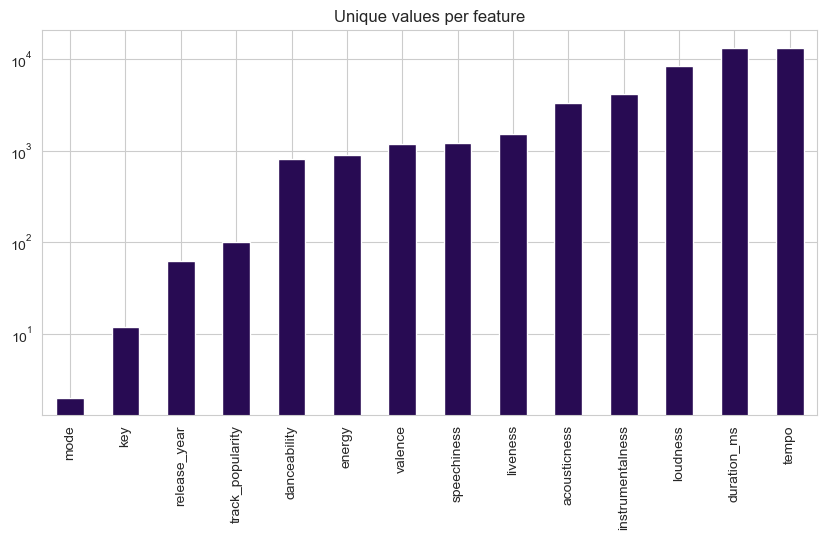

In [28]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(figsize=(10,5), title="Unique values per feature", logy=True)
plt.show()

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Missing values investigation

There are only a part of songs, where the lyrics was not extracted. I will just simply drop them.


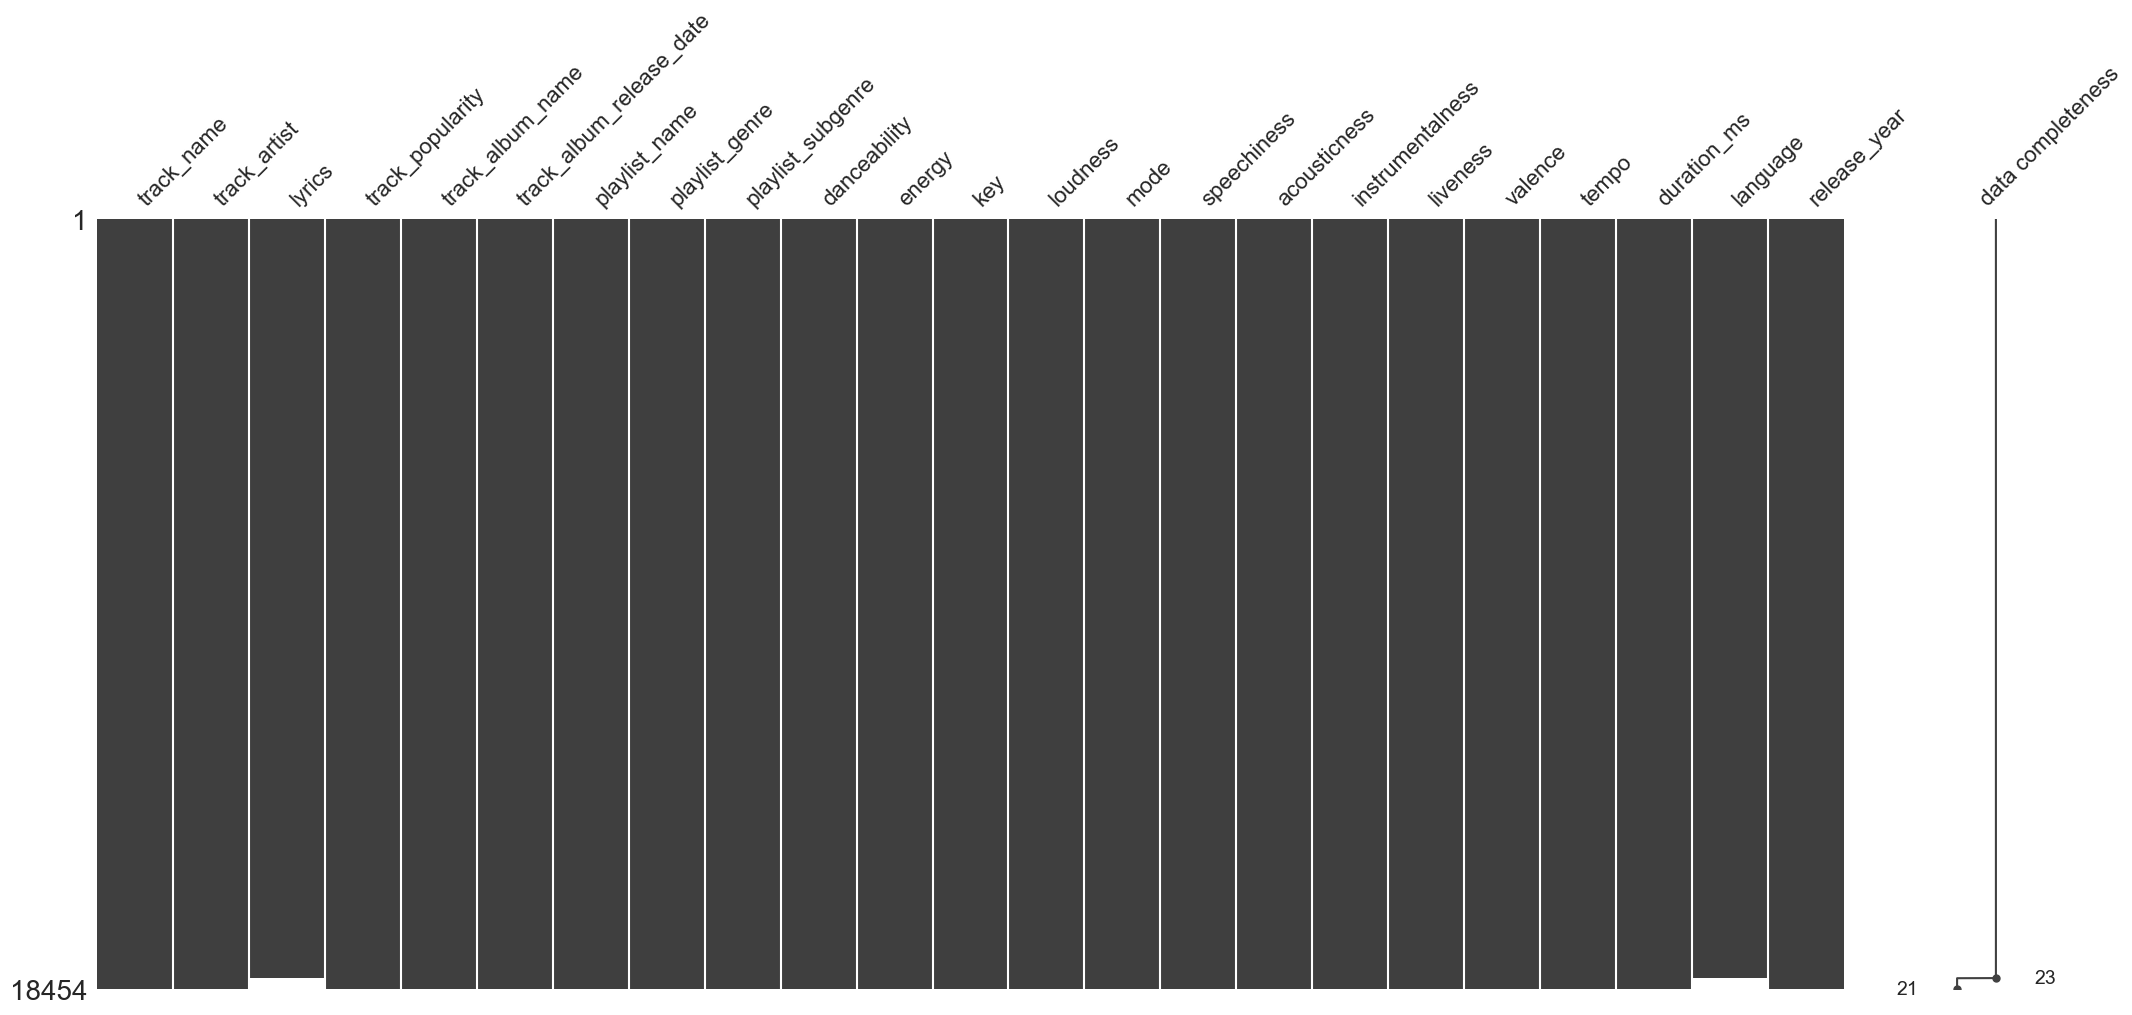

In [30]:
msno.matrix(df, labels=True, sort="descending")
plt.show()

In [31]:
df.dropna(inplace=True)

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# The amount of each genre in dataset



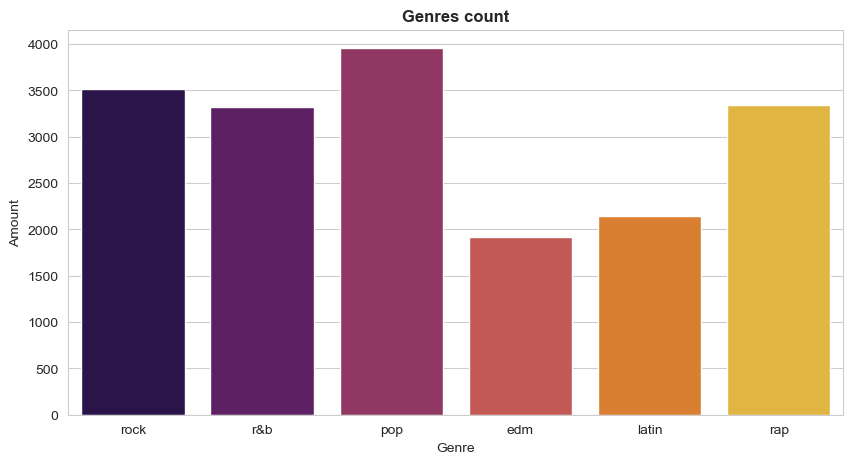

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="playlist_genre", hue="playlist_genre")
plt.title("Genres count", weight="bold")
plt.xlabel("Genre")
plt.ylabel("Amount")
plt.show()

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Now let's see how this looks like across years

Dataset clearly contains mostly fresh songs, with a lack in 2020 year, probably due to the early month of dataset creation.



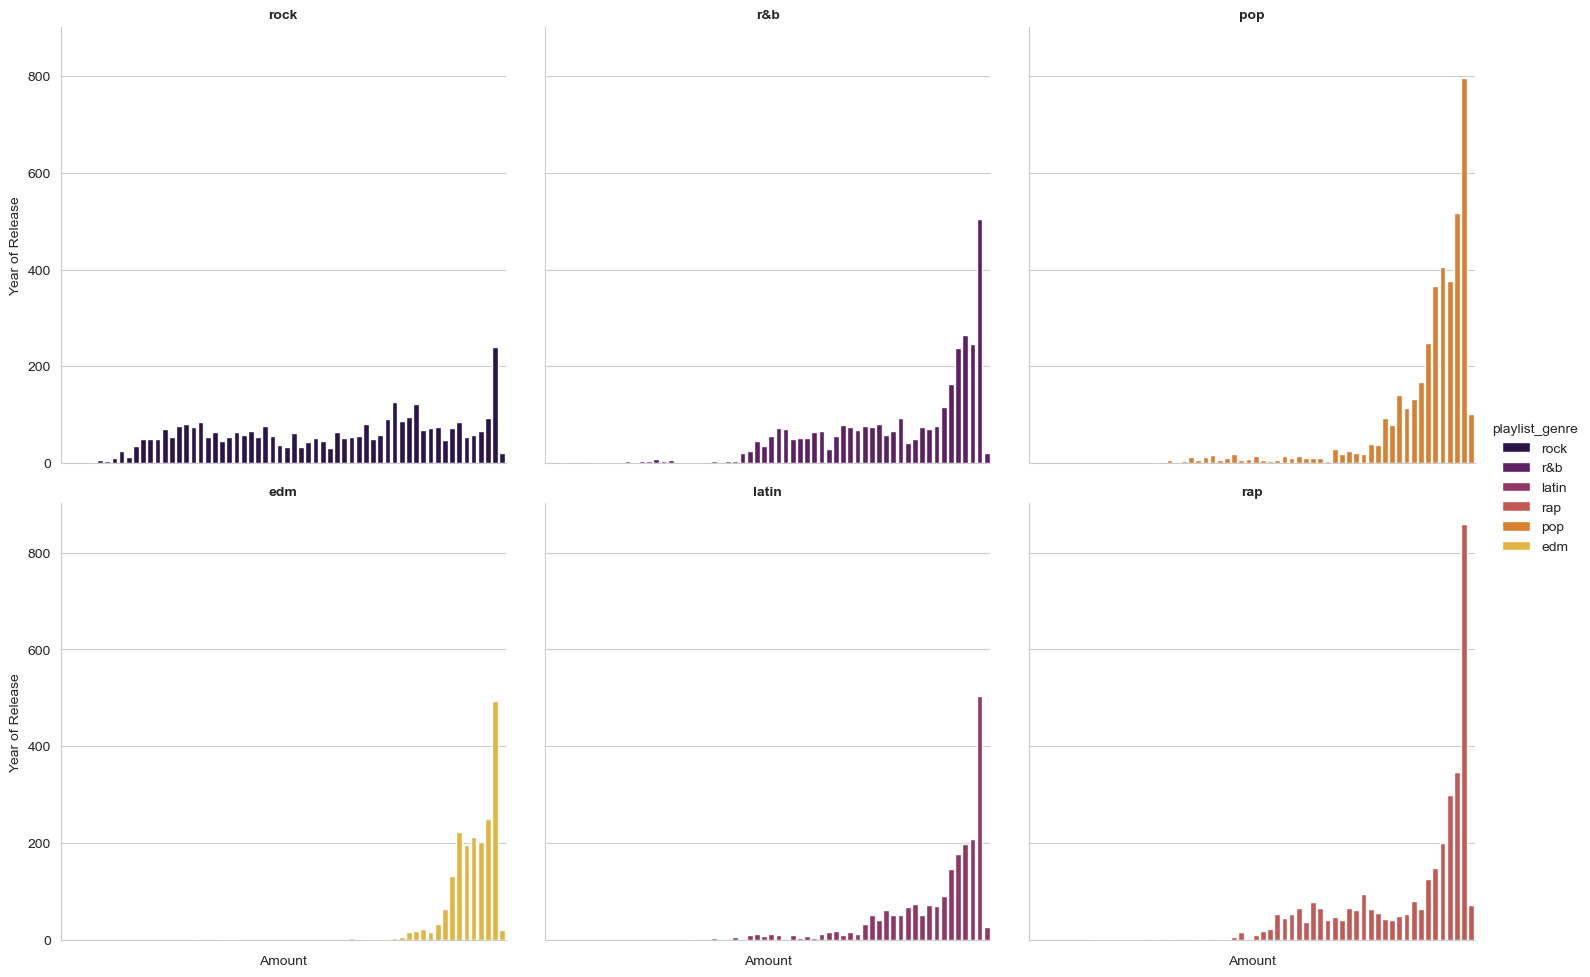

In [10]:
p = sns.catplot(data=df,
                x="release_year",
                col="playlist_genre",
                kind="count",
                col_wrap=3,
                hue="playlist_genre",
               )
p.set_titles("{col_name}", weight="bold")
p.set_axis_labels("Amount", "Year of Release")
p.set(xticklabels=[]) 

plt.show()

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Let's have a grasp of how data looks like

Now we can see, that we have one **binary** (mode), and one **ordinary** (key) feature.<br> The rest is numerical, and vary in their values.



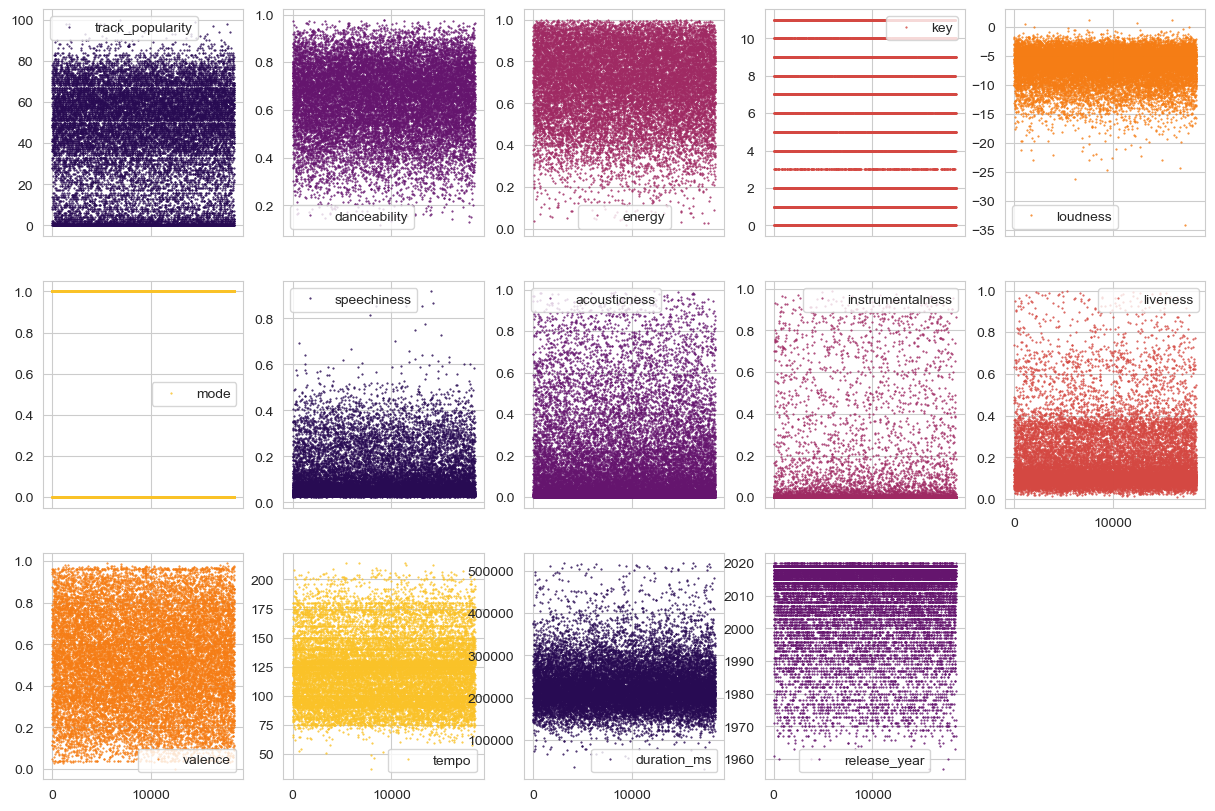

In [40]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1,5), figsize=(15,10), markersize=1)
plt.show()

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Most frequent artists in dataset

Wooah! There is over **120 Queen's songs** in the dataset!<br>
That's almost 2x more than the second position - **Don Omar**.
<br><br>
To be honest, I find it a little bit **suspicious**.
<br>
Let's look at the duplicates then!



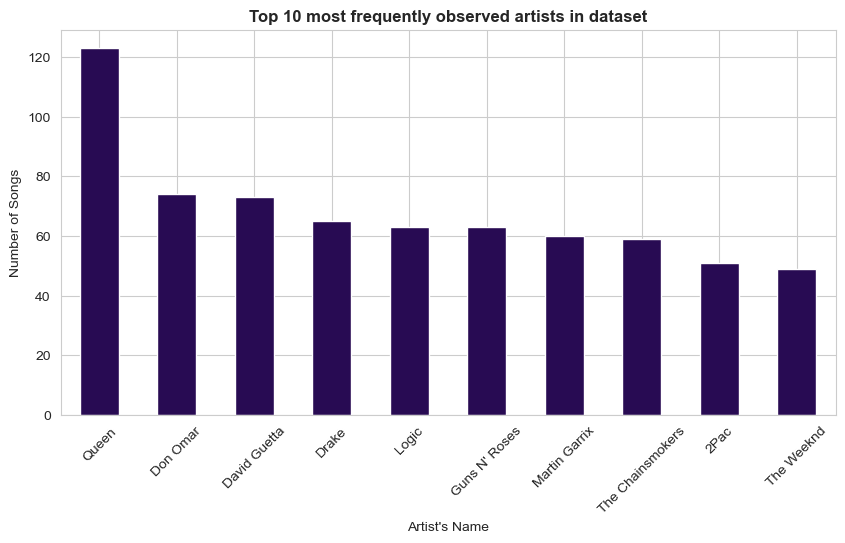

In [54]:
most_frequent_artists = df["track_artist"].value_counts().sort_values(ascending=False).head(10)
most_frequent_artists.plot(kind="bar", figsize=(10, 5))
plt.title("Top 10 most frequently observed artists in dataset", weight="bold")
plt.xlabel("Artist's Name")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.show()


<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Let's see the duplicates

Yeah, as I supposed - Almost **2000 of duplicated entries**, mainly for the artists from the previous graph.
<br>
Let's get rid of them and continue the analysis.



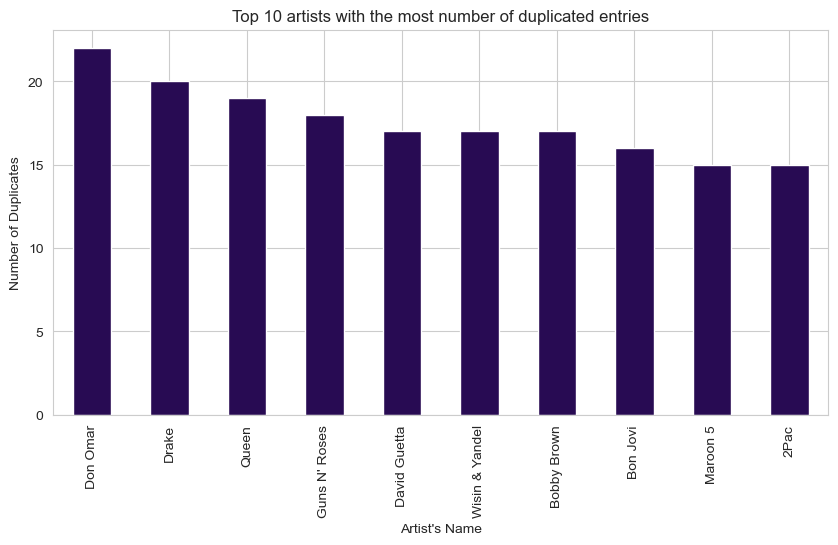

In [70]:
no_duplicates = df.drop_duplicates(subset=["track_name", "track_artist"])

duplicates = df[~df.isin(no_duplicates)].dropna()

duplicates["track_artist"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 artists with the most number of duplicated entries")
plt.xlabel("Artist's Name")
plt.ylabel("Number of Duplicates")
plt.show()

In [72]:
duplicates.shape[0]

1852

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Let's look at the feature distribution

Ok, so **first insights from the distrubutions:**

- **Strong right skewness** in terms of **speechiness, acousticness, instrumentalness** makes these features inbalanced in this dataset, presenting the songs mostly as the opposites of these metrics.

- Similiar situation is found in **liveness**, however the effect is not as strong as in the previously mentioned features.

- As I already mentioned before, where I only looked at the **Release year** distribution, there is a huge inbalance between new songs and the songs released in the far past. However this should not make a bigger problem, as I am not intending to predict, taking the year into account.


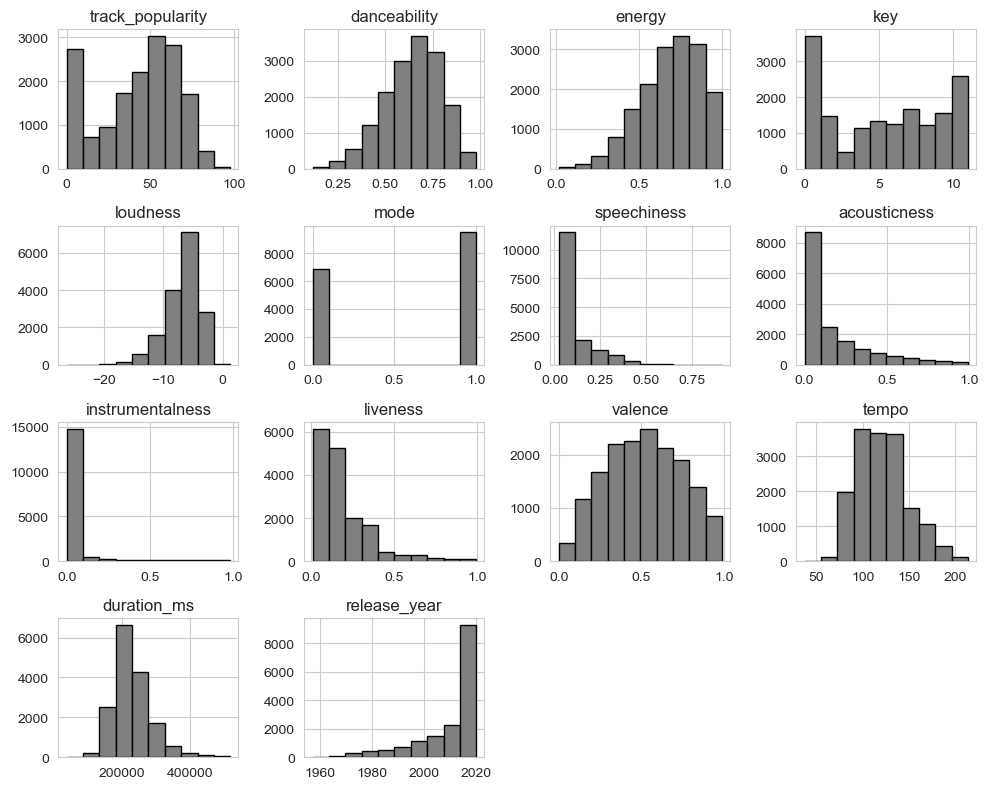

In [81]:
no_duplicates.hist(figsize=(10,8), layout=(-1,4), edgecolor="black", color="gray", bins=10)
plt.tight_layout()
plt.show()

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# Ok, let's see the relations between every feature

The **hexbin** will help to locate where the most of the data is located in the scatterplots.


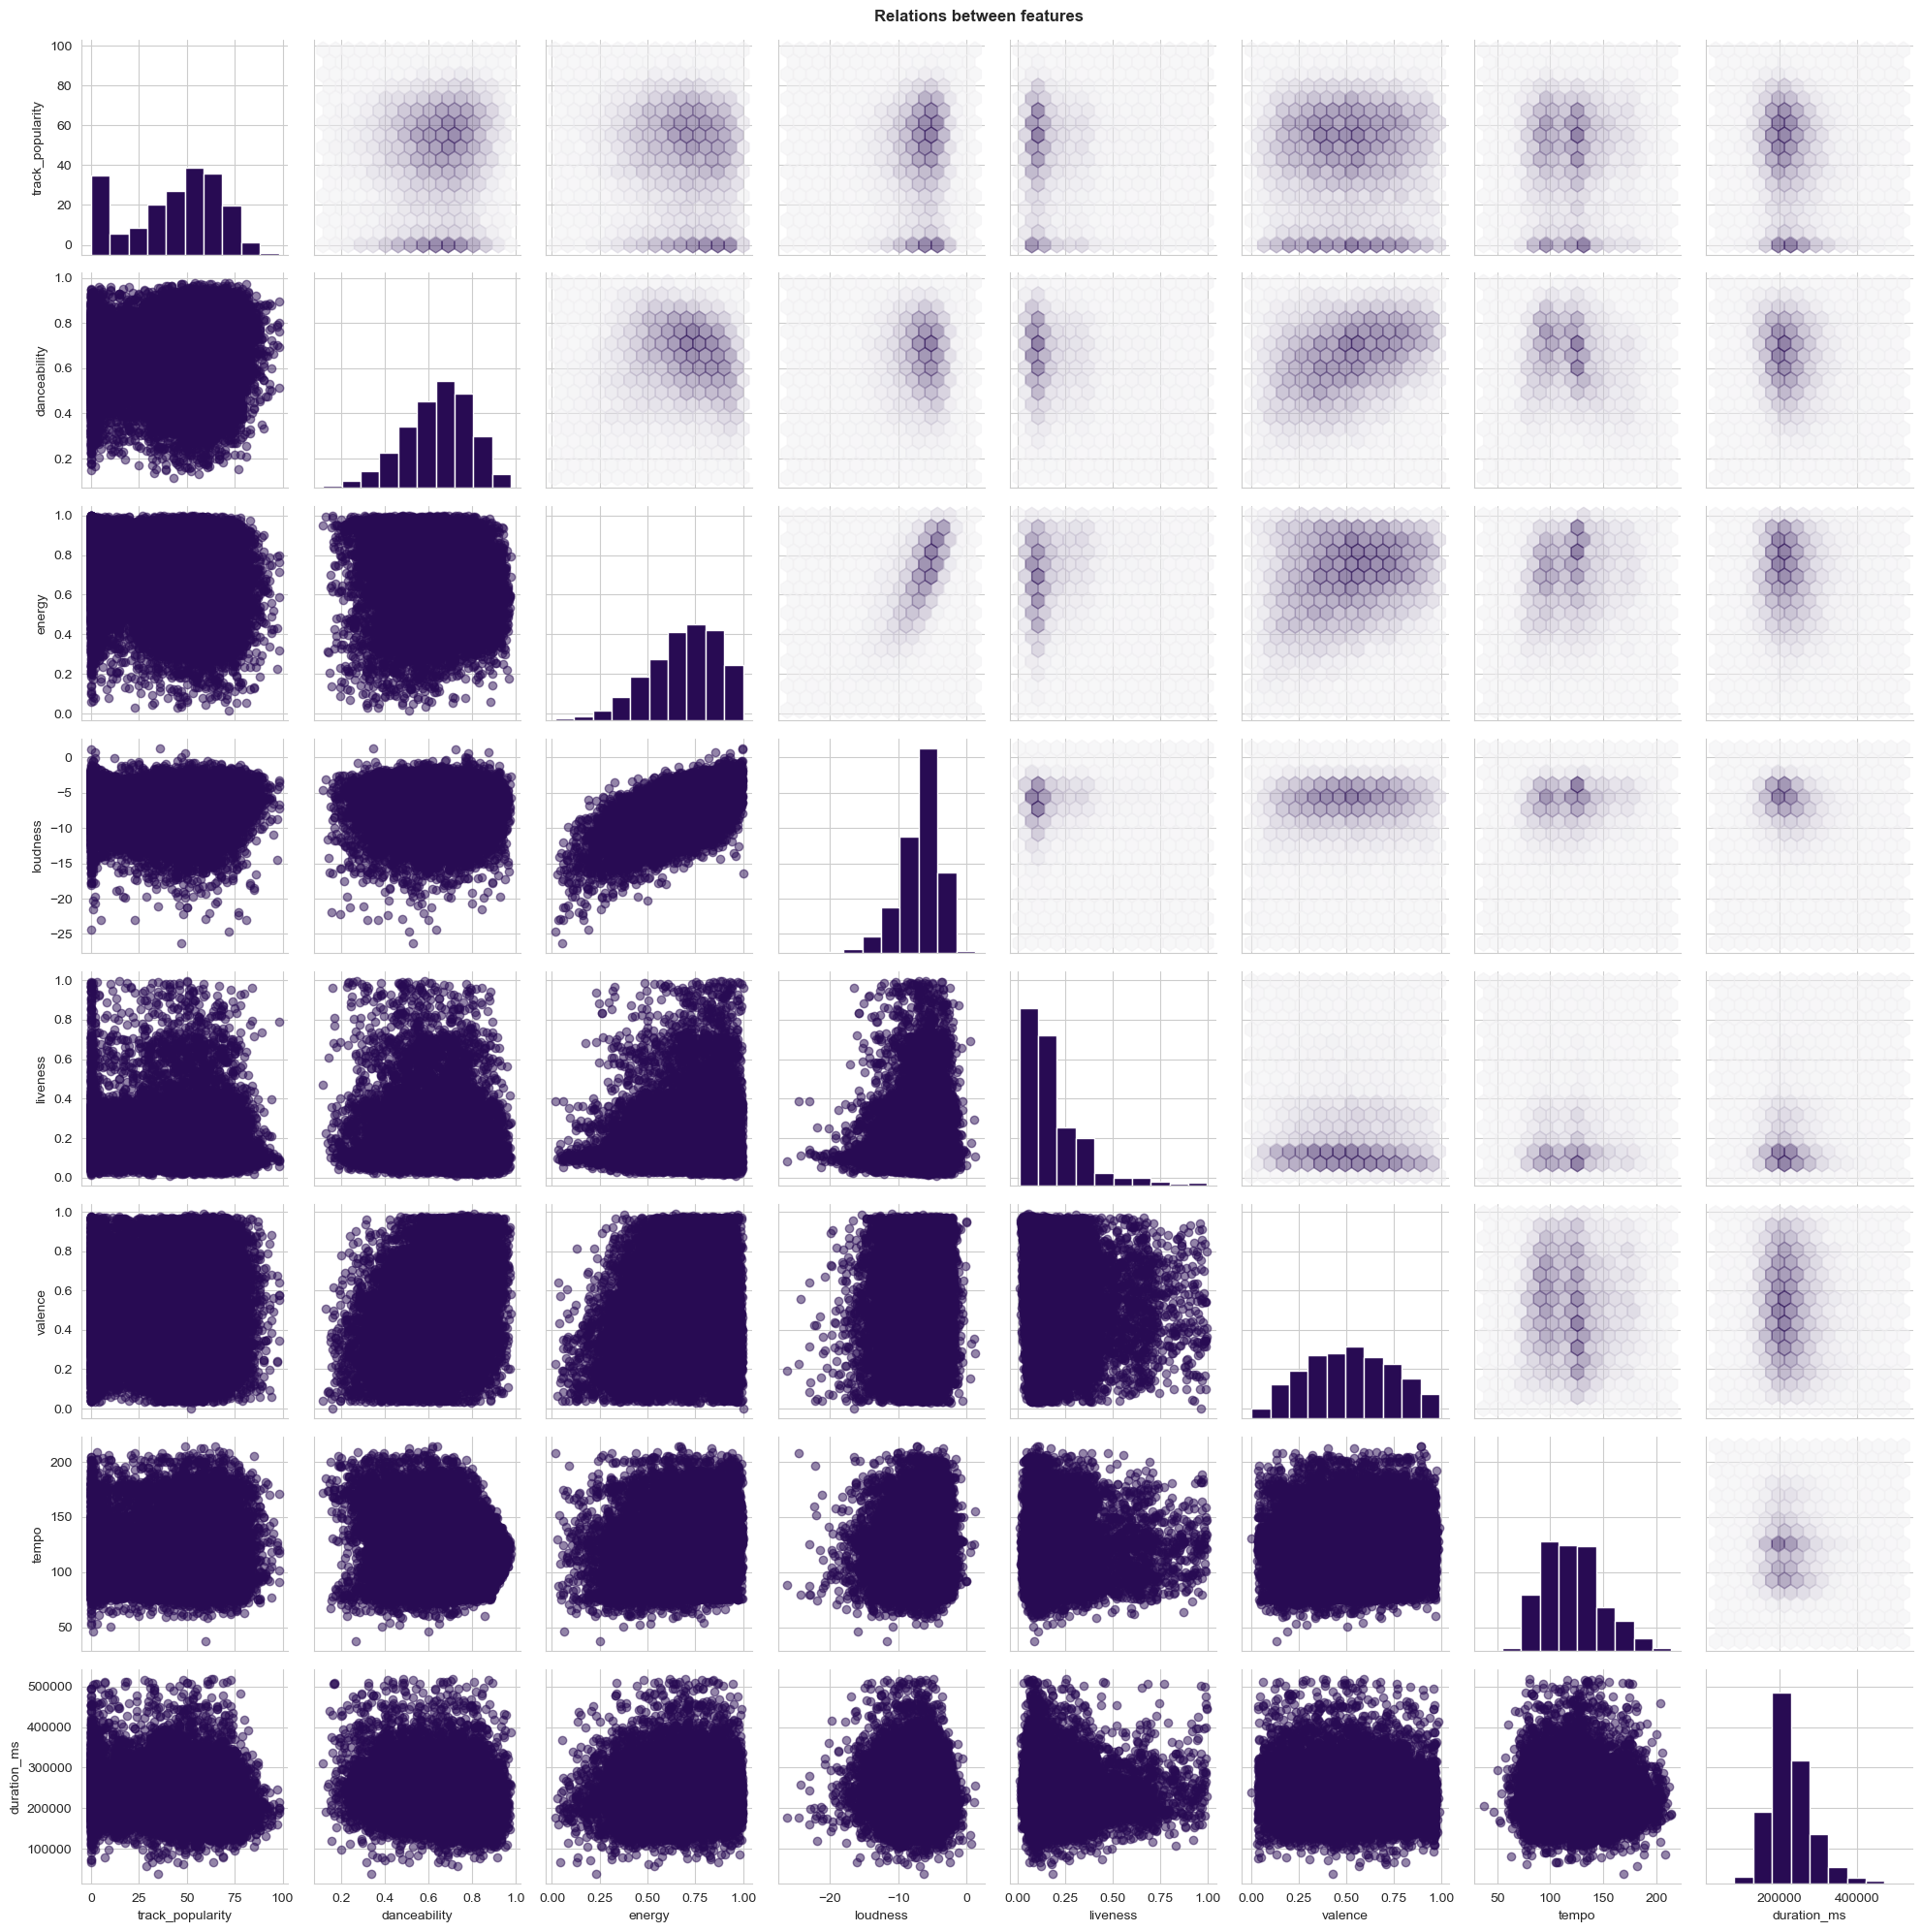

In [101]:
numerical_features = no_duplicates.select_dtypes(include="number").nunique() > 12
data_continous = no_duplicates[numerical_features[numerical_features].index]

def hex_pairplot(data, vars=None):

    def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
        cmap = sns.light_palette(color, as_cmap=True)
        ax = plt.gca()
        xmin, xmax = min_series[x.name], max_series[x.name]
        ymin, ymax = min_series[y.name], max_series[y.name]
        plt.hexbin(x, y, gridsize=15, cmap=cmap, extent=[xmin, xmax, ymin, ymax], **kwargs)
    if vars:
        g = sns.PairGrid(data[vars])
    else:
        g = sns.PairGrid(data)
    g.map_diag(plt.hist)
    g.map_lower(plt.scatter, alpha=0.5)
    g.map_upper(hexbin, min_series=data.min(), max_series=data.max(), alpha=0.5)

    return g

# excluding the strongly skewed features
g = hex_pairplot(data_continous, vars=["track_popularity", "danceability", "energy", "loudness", "liveness", "valence", "tempo", "duration_ms"])
g.fig.suptitle("Relations between features", y=1, weight="bold")
plt.show()

In [103]:
corr = no_duplicates.select_dtypes(include="number").corr()

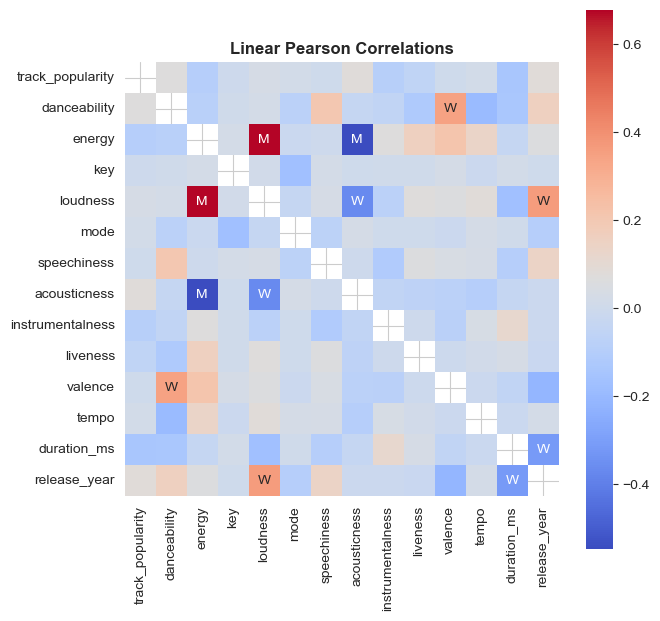

In [114]:
labels = np.where(np.abs(corr)>0.75, "S",
                  np.where(np.abs(corr)>0.5, "M",
                           np.where(np.abs(corr)>0.25, "W", "")))

plt.figure(figsize=(7,7))
sns.heatmap(corr, mask=np.eye(len(corr)),
            square=True, annot=labels, fmt='',
            cmap="coolwarm")
plt.title("Linear Pearson Correlations", weight="bold")
plt.show()

<div style="background: rgb(232, 232, 255); padding-left: 10px; border: 1px solid black; font-family: Monospace; border-radius: 15px; box-shadow: 2px 2px 0px 0px rgba(0,0,0,0.7);">

# What's next?

Before I dive in to the **analysis related to words used in lyrics**, I would like to see how different **metrics** differ across different **genres**.<br>
